# Kernel Methods - Homework

__Métodos Intensivos de Computación Estadística__

Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.co

See my [Github Account](https://github.com/juanse1608) to know more about me and my projects.

## Algorithm for Novelty Detection 5.4 

Let's implement this algorithm for two kernels: Gaussian and Polynomial.

In [327]:
import numpy as np
import scipy as sc
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

%config IPCompleter.greedy = True

In [4]:
#Let's plot the working directory
%cd ../../Datasets/

/Users/JuanSebastianCorredorRodriguez/Documents/Git Repositories/Jupyters-2019/Jupyters/Datasets


In [5]:
#Let's load the names and the data
names = pd.read_csv('wpbc_names.dat', header = None)
dta = pd.read_csv('breast_data.dat', header = None)

In [14]:
#Let's assign the names to each column of dta
names = np.array(names).reshape(32,)
dta.columns = names

In [16]:
#Let's see the columns of dta
print(dta.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [22]:
#Standardize dta
dta_raw = dta.drop(columns=['id','diagnosis'])
dta_raw.columns

#Create the Scaler object
scaler = preprocessing.StandardScaler()
#Get column names first
names = dta_raw.columns

#Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_dta = scaler.fit_transform(dta_raw)
scaled_dta = pd.DataFrame(scaled_dta, columns=names)

In [107]:
#Let's see the data
print(scaled_dta.shape)

(569, 30)


In [197]:
dta_train, dta_test, label_train, label_test = train_test_split(scaled_dta, dta['diagnosis'], test_size=0.3,
                                                                random_state=100)

### Gaussian Kernel 

Let's see how to implement the method with Gaussian Kernel

---

In [300]:
#Let's use sklearn for doing Novelty Detection
condfidence = 0.1
def kernel_gaussian_inverse(x,z, sigma=1.0):
    return np.exp(-(np.linalg.norm(x-z))**2/sigma**2)

dta_train.shape

(398, 30)

In [301]:
kernel_gaussian(dta_train.iloc[2,:], dta_train.iloc[2,:])

1.0

In [302]:
kernel_matrix = np.zeros((len(dta_train), len(dta_train)))
for i in range(len(dta_train)):
    for j in range(i,len(dta_train)):
        kernel_matrix[i,j] = kernel_gaussian(dta_train.iloc[i,:], dta_train.iloc[j,:])
        kernel_matrix[j,i] = kernel_gaussian(dta_train.iloc[i,:], dta_train.iloc[j,:])
    if i%100 == 0:
        print(i)

0
100
200
300


In [201]:
#The ell number
size_dta = len(dta_train)
#The parameters to create the distances 
col_means = kernel_matrix.mean(axis=1)
kernel_mean = col_means.mean()

tranining_distances_2 = np.diag(kernel_matrix) - (2*col_means) + (np.repeat(kernel_mean, len(kernel_matrix)))

#The maximum distance
maximum_distance = np.sqrt(np.max(tranining_distances_2))

In [202]:
#Back up parameter
esterr = np.sqrt(2*np.max(np.diag(kernel_matrix)/size_dta))*(np.sqrt(2) + np.sqrt(np.log(1/condfidence)))
threshold = maximum_distance + 2*esterr 
threshold = threshold*threshold

In [203]:
print('The threshold is:',threshold)

The threshold is: 2.0009588929139355


Let's see what happens on the test dataset:

In [204]:
#Calculate the KTests matrix
kernel_matrix_test = np.zeros((len(dta_train)+1, len(dta_test))) # con minuscula son los kernel de los test  

for i in range(len(dta_train)):
    for j in range(len(dta_test)):
        kernel_matrix_test[i,j] = kernel_gaussian(dta_train.iloc[i,:], dta_test.iloc[j,:])
        kernel_matrix_test[len(kernel_matrix_test)-100,j] = kernel_gaussian(dta_test.iloc[j,:], dta_test.iloc[j,:])
    if i%100 == 0:
        print(i) 

0
100
200
300


In [205]:
kernel_matrix_test.shape

(399, 171)

In [206]:
size_dta_test = kernel_matrix_test.shape[1]
d_test = np.sum(kernel_matrix_test[0:size_dta,:]) / size_dta
test_dist_2 = kernel_matrix_test[size_dta,:] - 2*d_test + (np.repeat(kernel_mean, size_dta_test))

#Print the novelty indices
novelty_indices = test_dist_2 > threshold 
novelty_indices

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Under the RBF (the Gaussian Kernel) there're not novelties using __Algorithm 5.4__.

### Polynomial Kernel 

Let's see how to implement the method with polynomial kernel. 

In this case, let's use the polynomial kernel with degree 2.

---

In [207]:
#Let's use sklearn for doing Novelty Detection
condfidence = 0.1
def kernel_polynomial(x,z, grado=2, constant=1):
    return (np.dot(x,z)+constant)**grado

dta_train.shape

(398, 30)

In [208]:
kernel_polynomial(dta_train.iloc[2,:], dta_train.iloc[2,:])

234.1101998114614

In [209]:
kernel_matrix = np.zeros((len(dta_train), len(dta_train)))
for i in range(len(dta_train)):
    for j in range(i,len(dta_train)):
        kernel_matrix[i,j] = kernel_polynomial(dta_train.iloc[i,:], dta_train.iloc[j,:])
        kernel_matrix[j,i] = kernel_polynomial(dta_train.iloc[i,:], dta_train.iloc[j,:])
    if i%100 == 0:
        print(i)

0
100
200
300


In [210]:
#The ell number
size_dta = len(dta_train)
#The parameters to create the distances 
col_means = kernel_matrix.mean(axis=1)
kernel_mean = col_means.mean()

tranining_distances_2 = np.diag(kernel_matrix) - (2*col_means) + (np.repeat(kernel_mean, len(kernel_matrix)))

#The maximum distance
maximum_distance = np.sqrt(np.max(tranining_distances_2))

In [211]:
#Back up parameter
esterr = np.sqrt(2*np.max(np.diag(kernel_matrix)/size_dta))*(np.sqrt(2) + np.sqrt(np.log(1/condfidence)))
threshold = maximum_distance + 2*esterr 
threshold = threshold*threshold

In [212]:
print('The threshold is:',threshold)

The threshold is: 329966.0133575029


Let's see what happens on the test dataset:

In [213]:
#Calculate the KTests matrix
kernel_matrix_test = np.zeros((len(dta_train)+1, len(dta_test))) # con minuscula son los kernel de los test  

for i in range(len(dta_train)):
    for j in range(len(dta_test)):
        kernel_matrix_test[i,j] = kernel_polynomial(dta_train.iloc[i,:], dta_test.iloc[j,:])
        kernel_matrix_test[len(kernel_matrix_test)-100,j] = kernel_polynomial(dta_test.iloc[j,:], dta_test.iloc[j,:])
    if i%100 == 0:
        print(i) 

0
100
200
300


In [214]:
kernel_matrix_test.shape

(399, 171)

In [215]:
size_dta_test = kernel_matrix_test.shape[1]
d_test = np.mean(kernel_matrix_test[0:size_dta,:])
test_dist_2 = kernel_matrix_test[size_dta,:] - 2*d_test + (np.repeat(kernel_mean, size_dta_test))

#Print the novelty indices
novelty_indices = test_dist_2 > threshold 
novelty_indices

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Under the Polynomial Kernel there're not novelties using __Algorithm 5.4__.

Niether one of the two kernels found a novelty.

## Parzen Based Classifier 5.6



Let's implement this classifier in the train dataset (using the Gaussian Kernel Matrix).

In [ ]:
kernel_matrix = np.zeros((len(dta_train), len(dta_train)))
for i in range(len(dta_train)):
    for j in range(i,len(dta_train)):
        kernel_matrix[i,j] = kernel_gaussian(dta_train.iloc[i,:], dta_train.iloc[j,:])
        kernel_matrix[j,i] = kernel_gaussian(dta_train.iloc[i,:], dta_train.iloc[j,:])

In [303]:

#The s_plus and s_minus
s_plus = dta_train[label_train == 'M']
s_minus = dta_train[label_train == 'B']

#The l_plus and l_minus
l_plus = len(s_plus)
l_minus = len(s_minus)

In [304]:
#The alpha_minus and alpha_plus
alpha_plus = (label_train == 'M').astype(int)
alpha_minus = (label_train == 'B').astype(int)

In [305]:
alpha_plus_t = np.matrix(np.array(alpha_plus).reshape((1,398)))
alpha_plus_nt = np.matrix(np.array(alpha_plus).reshape((398,1)))


alpha_minus_t = np.matrix(np.array(alpha_minus).reshape((1,398)))
alpha_minus_nt = np.matrix(np.array(alpha_minus).reshape((398,1)))
kernel_matrix_matrix = np.matrix(kernel_matrix)

positive = (np.matmul(np.matmul(alpha_plus_t, kernel_matrix_matrix), alpha_plus_nt))
negative = (np.matmul(np.matmul(alpha_minus_t, kernel_matrix_matrix), alpha_minus_nt))

b_result = 0.5*(positive - negative)

In [306]:
#Let's define alpha
alpha = alpha_plus - alpha_minus

In [307]:
#Let's define the function that clasifies
def parzen_classifier(b, alpha, test, train):
    resultado = -b
    for i in range(len(alpha)):
        resultado += alpha[i]*kernel_polynomial(train[i],test)
    return np.sign(resultado)

In [308]:
predictions = []
for i in range(len(dta_test)):
    pred = parzen_classifier(b=b_result[0,0], alpha=np.array(alpha), test=np.array(dta_test)[i],
                             train=np.array(dta_train))
    predictions = np.append(predictions, pred)
predictions

array([ 1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.])

In [319]:
labels = (label_test == 'M').astype(int)
labels[labels == 0] = -1

In [320]:
#Let's plot the confusion matrix
#Function which objective is to plot in a fancy way the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")

    #print(cm)

    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

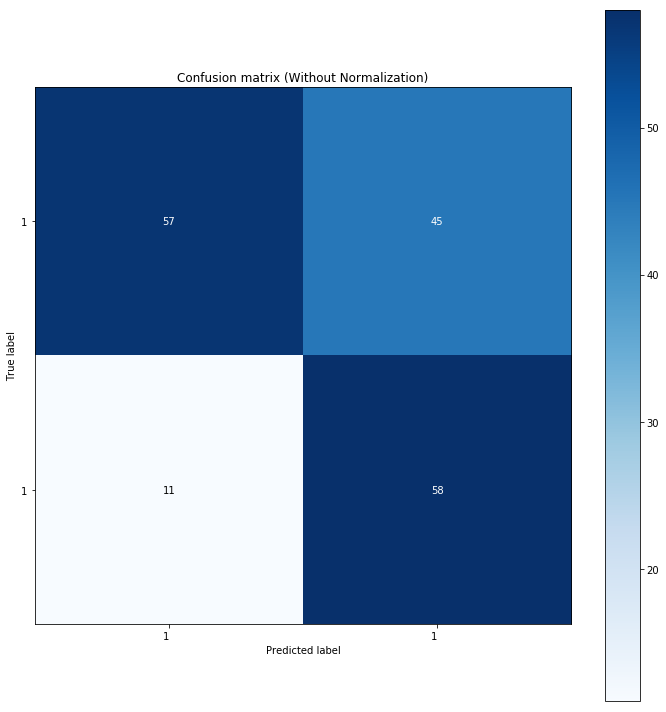

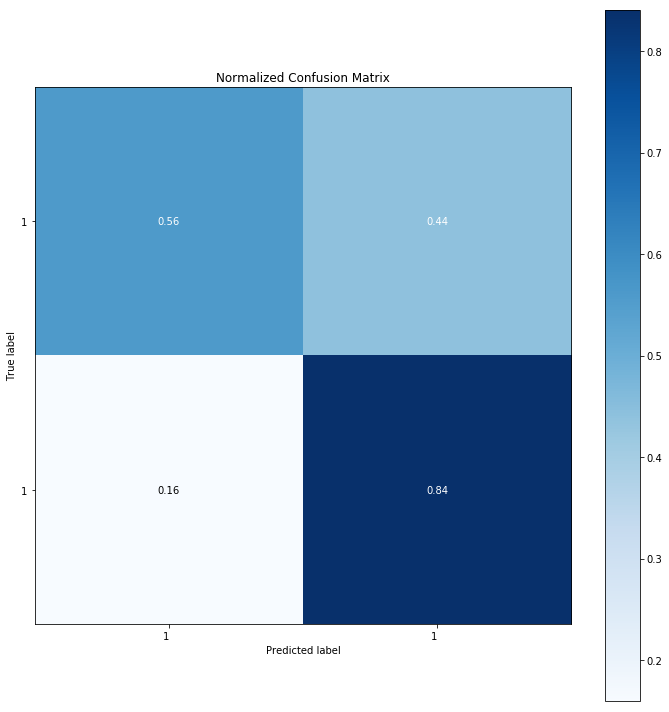

In [325]:
#Plot non-normalized confusion matrix
plot_confusion_matrix(labels, predictions, classes=np.sort(np.unique(labels)),
                      title='Confusion matrix (Without Normalization)')

plt.show()
# Plot normalized confusion matrix
plot_confusion_matrix(labels, predictions, classes=np.sort(np.unique(labels)),
                      normalize=True, title='Normalized Confusion Matrix')

plt.show()

In [329]:
expected = labels
print("Classification report for classifier %s:\n%s\n"
      % ('Parzen Based Classifier', metrics.classification_report(expected, predictions)))

Classification report for classifier Parzen Based Classifier:
              precision    recall  f1-score   support

          -1       0.84      0.56      0.67       102
           1       0.56      0.84      0.67        69

   micro avg       0.67      0.67      0.67       171
   macro avg       0.70      0.70      0.67       171
weighted avg       0.73      0.67      0.67       171




There is one class with high precision and low recall and other with high recall and low precision. 
The $F_1$-score is 0.67. Which I think it is pretty good for a Kernel Classifier such as this.